## Loan EDA

In [403]:
import pandas as pd
import numpy as np

In [405]:
dtrain = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Data Cleaning

In [406]:
dtrain.head()

,Loan_ID,Loan_Amount_Requested,Loan_Grade,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Area_Type,Gender,Interest_Rate
0,10000001,"7,000",A,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,B,Female,1
1,10000002,"30,000",A,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,A,Female,3
2,10000003,"24,725",D,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,B,Male,3
3,10000004,"16,000",D,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,A,Male,3
4,10000005,"17,000",A,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,B,Female,1


In [407]:
dtrain.shape

(164309, 16)

In [408]:
# Removing the commas form `Loan_Amount_Requested`
dtrain['Loan_Amount_Requested'] = dtrain.Loan_Amount_Requested.str.replace(',', '').astype(int)
test['Loan_Amount_Requested'] = test.Loan_Amount_Requested.str.replace(',', '').astype(int)

In [409]:
# Filling 0 for `Annual_Income` column
dtrain['Annual_Income'] = dtrain['Annual_Income'].fillna(0).astype(int)
test['Annual_Income'] = test['Annual_Income'].fillna(0).astype(int)

In [410]:
# Showing the different types of values for `Home_Owner`
dtrain['Home_Owner'] = dtrain['Home_Owner'].fillna('NA')
test['Home_Owner'] = test['Home_Owner'].fillna('NA')
print(dtrain.Home_Owner.value_counts())

Mortgage    70345
Rent        56031
NA          25349
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64


We converted the ```NaN``` in ```Home_Owner``` into ```NA```. We are going to calculate the hash value of the string and we don't know how ```NaN``` should be replced. Now we see that there are almost **25349** rows which was NaN. Dropping these would cause loosing a lot of data. Hence we replaced these with sting "NA" and then converted these into hash values

In [411]:
# Filling 0 for missing `Months_Since_Deliquency`
dtrain['Months_Since_Deliquency'] = dtrain['Months_Since_Deliquency'].fillna(0)
test['Months_Since_Deliquency'] = test['Months_Since_Deliquency'].fillna(0)

In [412]:
dtrain.isnull().values.any()

True

In [413]:
dtrain['Length_Employed'] = dtrain['Length_Employed'].fillna('0 year')
test['Length_Employed'] = test['Length_Employed'].fillna('0 year')

In [414]:
def convert_length_employed(elem):
    if elem[0] == '<':
        return 0.5 # because mean of 0 to 1 is 0.5
    elif str(elem[2]) == '+':
        return 15.0 # because mean of 10 to 20 is 15
    elif str(elem) == '0 year':
        return 0.0
    else:
        return float(str(elem).split()[0])
dtrain['Length_Employed'] = dtrain['Length_Employed'].apply(convert_length_employed)
test['Length_Employed'] = test['Length_Employed'].apply(convert_length_employed)

In [415]:
dtrain['Loan_Grade'] = dtrain['Loan_Grade'].fillna('NA')
test['Loan_Grade'] = test['Loan_Grade'].fillna('NA')
dtrain.Loan_Grade.value_counts()

B     38540
C     35098
A     26887
NA    25053
D     24045
E     14686
Name: Loan_Grade, dtype: int64

In [416]:
# dtrain[(dtrain.Annual_Income == 0) & (dtrain.Income_Verified == 'not verified')]

In [417]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
dtrain['Loan_Grade'] = number.fit_transform(dtrain.Loan_Grade.astype('str'))
dtrain['Income_Verified'] = number.fit_transform(dtrain.Income_Verified.astype('str'))
dtrain['Area_Type'] = number.fit_transform(dtrain.Area_Type.astype('str'))
dtrain['Gender'] = number.fit_transform(dtrain.Gender.astype('str'))

test['Loan_Grade'] = number.fit_transform(test.Loan_Grade.astype('str'))
test['Income_Verified'] = number.fit_transform(test.Income_Verified.astype('str'))
test['Area_Type'] = number.fit_transform(test.Area_Type.astype('str'))
test['Gender'] = number.fit_transform(test.Gender.astype('str'))

In [418]:
dtrain.head()

,Loan_ID,Loan_Amount_Requested,Loan_Grade,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Area_Type,Gender,Interest_Rate
0,10000001,7000,0,0.5,Rent,68000,2,car,18.37,0,0.0,9,14,1,0,1
1,10000002,30000,0,4.0,Mortgage,0,0,debt_consolidation,14.93,0,17.0,12,24,0,0,3
2,10000003,24725,3,7.0,Mortgage,75566,1,debt_consolidation,15.88,0,0.0,12,16,1,1,3
3,10000004,16000,3,0.5,NA,56160,1,debt_consolidation,14.34,3,0.0,16,22,0,1,3
4,10000005,17000,0,8.0,Own,96000,1,debt_consolidation,22.17,1,0.0,19,30,1,0,1


In [419]:
# Converting `Purpose_Of_Loan` and `Home_Owner` into hash
import hashlib

def convert_to_hashes(elem):
    return round(int(hashlib.md5(elem.encode('utf-8')).hexdigest(), 16) / 1e35, 5)

dtrain['Purpose_Of_Loan'] = dtrain['Purpose_Of_Loan'].apply(convert_to_hashes)
dtrain['Home_Owner'] = dtrain['Home_Owner'].apply(convert_to_hashes)

test['Purpose_Of_Loan'] = test['Purpose_Of_Loan'].apply(convert_to_hashes)
test['Home_Owner'] = test['Home_Owner'].apply(convert_to_hashes)

In [420]:
import xgboost as xgb

features = np.array(dtrain.iloc[:, 1:-1])
labels = np.array(dtrain.iloc[:, -1])

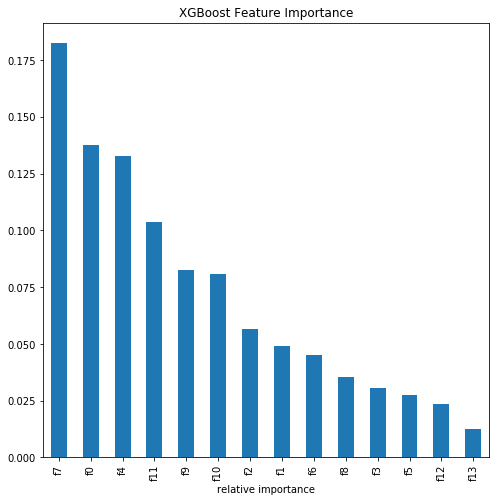

In [407]:
import operator
from xgboost import plot_importance
from matplotlib import pylab as plt
from collections import OrderedDict
def xgb_feature_importance(features, labels, num_rounds, fnames, plot=False):
    param = {}
    param['objective'] = 'multi:softmax'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 4
    param['eval_metric'] = "merror"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = 42
    nrounds = num_rounds
    xgtrain = xgb.DMatrix(features, label=labels)
    xgb_params = list(param.items())
    gbdt = xgb.train(xgb_params, xgtrain, nrounds)
    importance = sorted(gbdt.get_fscore().items(), key=operator.itemgetter(1), reverse=True)
    if plot:
        df = pd.DataFrame(importance, columns=['feature', 'fscore'])
        df['fscore'] = df['fscore'] / df['fscore'].sum()
        plt.figure()
        df.plot(kind='bar', x='feature', y='fscore', legend=False, figsize=(8, 8))
        plt.title('XGBoost Feature Importance')
        plt.xlabel('relative importance')
        plt.show()
    else:
#         fnames = dtrain.columns.values[1:-1].tolist()
        imp_features = OrderedDict()
        imps = dict(importance)
        for each in list(imps.keys()):
            index = int(each.split('f')[-1])
            imp_features[fnames[index]] = imps[each]
        return imp_features

xgb_feature_importance(features, labels, num_rounds=1000, fnames=dtrain.columns.values[1:-1].tolist(), plot=True)

## Features Scores

```python
OrderedDict([('Debt_To_Income', 29377),
             ('Loan_Amount_Requested', 22157),
             ('Annual_Income', 21378),
             ('Total_Accounts', 16675),
             ('Months_Since_Deliquency', 13287),
             ('Number_Open_Accounts', 13016),
             ('Length_Employed', 9140),
             ('Loan_Grade', 7906),
             ('Purpose_Of_Loan', 7284),
             ('Inquiries_Last_6Mo', 5691),
             ('Home_Owner', 4946),
             ('Income_Verified', 4434),
             ('Area_Type', 3755),
             ('Gender', 2027)])
```

## Feature Creation

### 1. RatioOfLoanAndIncome

In [320]:
dtrain['RatioOfLoanAndIncome'] = dtrain.Loan_Amount_Requested / (dtrain.Annual_Income + 1)
test['RatioOfLoanAndIncome'] = test.Loan_Amount_Requested / (test.Annual_Income + 1)

### 2. RatioOfOpenAccToTotalAcc

In [321]:
dtrain['RatioOfOpenAccToTotalAcc'] = dtrain.Number_Open_Accounts / (dtrain.Total_Accounts + 0.001)
test['RatioOfOpenAccToTotalAcc'] = test.Number_Open_Accounts / (test.Total_Accounts + 0.001)

In [322]:
dtrain.drop(['Interest_Rate', 'Loan_Amount_Requested',
            'Annual_Income', 'Number_Open_Accounts', 'Total_Accounts'], inplace=True, axis=1)
dtrain['Interest_Rate'] = labels

test.drop(['Loan_Amount_Requested',
            'Annual_Income', 'Number_Open_Accounts', 'Total_Accounts'], inplace=True, axis=1)

In [421]:
features = np.array(dtrain.iloc[:, 1:-1])

In [422]:
testFeatures = np.array(test.iloc[:, 1:])

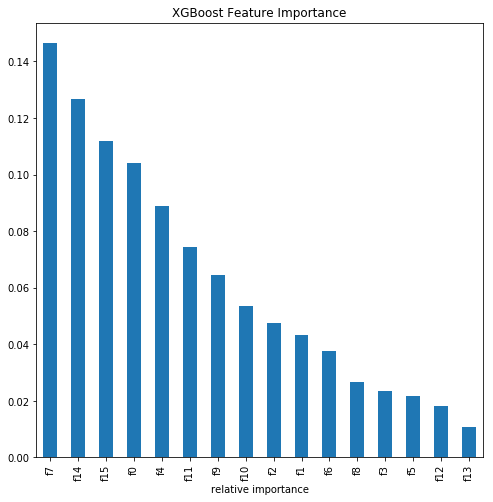

In [388]:
xgb_feature_importance(features, labels, num_rounds=1000, fnames=dtrain.columns.values[1:-1].tolist(), plot=True)

## Feature Score with new features

```python
OrderedDict([('Debt_To_Income', 23402),
             ('RatioOfLoanAndIncome', 20254),
             ('RatioOfOpenAccToTotalAcc', 17868),
             ('Loan_Amount_Requested', 16661),
             ('Annual_Income', 14228),
             ('Total_Accounts', 11892),
             ('Months_Since_Deliquency', 10293),
             ('Number_Open_Accounts', 8553),
             ('Length_Employed', 7614),
             ('Loan_Grade', 6938),
             ('Purpose_Of_Loan', 6013),
             ('Inquiries_Last_6Mo', 4284),
             ('Home_Owner', 3760),
             ('Income_Verified', 3451),
             ('Area_Type', 2892),
             ('Gender', 1708)])
```

In [428]:
from sklearn.model_selection import train_test_split # for splitting the training and testing set
from sklearn.decomposition import PCA # For possible dimentionality reduction
from sklearn.feature_selection import SelectKBest # For feature selction
from sklearn.model_selection import StratifiedShuffleSplit # For unbalanced class cross-validation
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler # Different scalars
from sklearn.pipeline import Pipeline # For putting tasks in Pipeline
from sklearn.model_selection import GridSearchCV # For fine tuning the classifiers

In [429]:
from sklearn.naive_bayes import BernoulliNB # For Naive Bayes
from sklearn.neighbors import NearestCentroid # From modified KNN
from sklearn.svm import SVC # For SVM Classifier
from sklearn.tree import DecisionTreeClassifier # From decision Tree Classifier

In [430]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

In [431]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [432]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions, normalize=True))

0.558867384821


In [433]:
X_test.shape

(65724, 14)

### XGBoost Cassification

In [442]:
def xgb_classification(X_train, X_test, y_train, y_test, num_rounds, fnames='*'):
    if fnames == '*':
        # All the features are being used
        pass
    else:
        # Feature selection is being performed
        fnames.append('Interest_Rate')
        dataset = dtrain[fnames]
        features = np.array(dataset.iloc[:, 0:-1])
        labels = np.array(dataset.iloc[:, -1])
        X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                            test_size=0.4, 
                                                            random_state=42)
    param = {}
    param['objective'] = 'multi:softmax'
    param['eta'] = 0.01
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 4
    param['nthread'] = -1
    param['eval_metric'] = "merror"
    param['min_child_weight'] = 1
    param['subsample'] = 0.8
    param['colsample_bytree'] = 0.5
    param['seed'] = 42
    xg_train = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    bst = xgb.train(param, xg_train, num_rounds, watchlist)
    pred = bst.predict(xg_test)
    return accuracy_score(y_test, pred, normalize=True)

In [443]:
# 0.70447629480859353 <-- Boosting Rounds 1000
# 0.70506968535086123 <--- Boosting Rounds 862
# 0.70520662162984604 <-- Boosting Rounds 846
xgb_classification(X_train, X_test, y_train, y_test, num_rounds=1000, fnames='*')

[0]	train-merror:0.318345	test-merror:0.323154
[1]	train-merror:0.309753	test-merror:0.31261
[2]	train-merror:0.310199	test-merror:0.312899
[3]	train-merror:0.304925	test-merror:0.306783
[4]	train-merror:0.305381	test-merror:0.308015
[5]	train-merror:0.303636	test-merror:0.307011
[6]	train-merror:0.301161	test-merror:0.305094
[7]	train-merror:0.301699	test-merror:0.306037
[8]	train-merror:0.302287	test-merror:0.30622
[9]	train-merror:0.303119	test-merror:0.307194
[10]	train-merror:0.301932	test-merror:0.304972
[11]	train-merror:0.30245	test-merror:0.305064
[12]	train-merror:0.301963	test-merror:0.305185
[13]	train-merror:0.302135	test-merror:0.305535
[14]	train-merror:0.302511	test-merror:0.306022
[15]	train-merror:0.301942	test-merror:0.305855
[16]	train-merror:0.302429	test-merror:0.305474
[17]	train-merror:0.301709	test-merror:0.30447
[18]	train-merror:0.301141	test-merror:0.304394
[19]	train-merror:0.301557	test-merror:0.304501
[20]	train-merror:0.300593	test-merror:0.303664
[21]	t

[171]	train-merror:0.295998	test-merror:0.300347
[172]	train-merror:0.296049	test-merror:0.300256
[173]	train-merror:0.296059	test-merror:0.30018
[174]	train-merror:0.295988	test-merror:0.300423
[175]	train-merror:0.296019	test-merror:0.300301
[176]	train-merror:0.296039	test-merror:0.300362
[177]	train-merror:0.295938	test-merror:0.300423
[178]	train-merror:0.295887	test-merror:0.300347
[179]	train-merror:0.296171	test-merror:0.300423
[180]	train-merror:0.296161	test-merror:0.300332
[181]	train-merror:0.295927	test-merror:0.300408
[182]	train-merror:0.296039	test-merror:0.300301
[183]	train-merror:0.295887	test-merror:0.30024
[184]	train-merror:0.295907	test-merror:0.300347
[185]	train-merror:0.295796	test-merror:0.300225
[186]	train-merror:0.295887	test-merror:0.300195
[187]	train-merror:0.295725	test-merror:0.30024
[188]	train-merror:0.295653	test-merror:0.300271
[189]	train-merror:0.295674	test-merror:0.300195
[190]	train-merror:0.295613	test-merror:0.300119
[191]	train-merror:0.29

[339]	train-merror:0.291221	test-merror:0.297806
[340]	train-merror:0.291129	test-merror:0.297806
[341]	train-merror:0.29116	test-merror:0.297836
[342]	train-merror:0.291129	test-merror:0.297776
[343]	train-merror:0.291038	test-merror:0.297669
[344]	train-merror:0.290916	test-merror:0.29776
[345]	train-merror:0.290916	test-merror:0.297745
[346]	train-merror:0.290906	test-merror:0.297821
[347]	train-merror:0.290916	test-merror:0.297821
[348]	train-merror:0.290866	test-merror:0.297699
[349]	train-merror:0.290876	test-merror:0.29776
[350]	train-merror:0.290906	test-merror:0.297791
[351]	train-merror:0.290906	test-merror:0.29776
[352]	train-merror:0.290896	test-merror:0.297745
[353]	train-merror:0.290815	test-merror:0.297836
[354]	train-merror:0.290845	test-merror:0.297836
[355]	train-merror:0.290845	test-merror:0.297852
[356]	train-merror:0.290856	test-merror:0.297821
[357]	train-merror:0.290774	test-merror:0.29776
[358]	train-merror:0.290754	test-merror:0.29776
[359]	train-merror:0.29070

[508]	train-merror:0.287316	test-merror:0.296482
[509]	train-merror:0.287265	test-merror:0.296467
[510]	train-merror:0.287204	test-merror:0.296421
[511]	train-merror:0.287255	test-merror:0.296376
[512]	train-merror:0.287234	test-merror:0.296315
[513]	train-merror:0.287194	test-merror:0.296345
[514]	train-merror:0.287204	test-merror:0.296269
[515]	train-merror:0.287153	test-merror:0.29633
[516]	train-merror:0.287052	test-merror:0.29633
[517]	train-merror:0.287021	test-merror:0.296376
[518]	train-merror:0.287052	test-merror:0.296284
[519]	train-merror:0.28695	test-merror:0.296224
[520]	train-merror:0.287011	test-merror:0.2963
[521]	train-merror:0.286889	test-merror:0.296315
[522]	train-merror:0.28695	test-merror:0.29633
[523]	train-merror:0.28692	test-merror:0.296315
[524]	train-merror:0.28696	test-merror:0.296391
[525]	train-merror:0.2869	test-merror:0.296315
[526]	train-merror:0.28691	test-merror:0.296284
[527]	train-merror:0.286889	test-merror:0.296406
[528]	train-merror:0.286869	test

[677]	train-merror:0.283775	test-merror:0.295524
[678]	train-merror:0.283694	test-merror:0.295509
[679]	train-merror:0.283633	test-merror:0.295539
[680]	train-merror:0.283583	test-merror:0.295509
[681]	train-merror:0.283562	test-merror:0.295554
[682]	train-merror:0.283552	test-merror:0.295554
[683]	train-merror:0.283491	test-merror:0.295402
[684]	train-merror:0.283512	test-merror:0.295402
[685]	train-merror:0.283502	test-merror:0.295417
[686]	train-merror:0.283471	test-merror:0.295402
[687]	train-merror:0.283491	test-merror:0.295356
[688]	train-merror:0.283512	test-merror:0.295326
[689]	train-merror:0.283502	test-merror:0.295265
[690]	train-merror:0.283512	test-merror:0.295311
[691]	train-merror:0.283522	test-merror:0.295265
[692]	train-merror:0.283542	test-merror:0.295356
[693]	train-merror:0.283532	test-merror:0.295372
[694]	train-merror:0.283532	test-merror:0.295402
[695]	train-merror:0.283512	test-merror:0.295402
[696]	train-merror:0.283573	test-merror:0.295387
[697]	train-merror:0

[845]	train-merror:0.281463	test-merror:0.294002
[846]	train-merror:0.281473	test-merror:0.294002
[847]	train-merror:0.281442	test-merror:0.294002
[848]	train-merror:0.281412	test-merror:0.294033
[849]	train-merror:0.281412	test-merror:0.294063
[850]	train-merror:0.281412	test-merror:0.293987
[851]	train-merror:0.281432	test-merror:0.293972
[852]	train-merror:0.281422	test-merror:0.294002
[853]	train-merror:0.281412	test-merror:0.294002
[854]	train-merror:0.281392	test-merror:0.294002
[855]	train-merror:0.281402	test-merror:0.293911
[856]	train-merror:0.281422	test-merror:0.293941
[857]	train-merror:0.281402	test-merror:0.293941
[858]	train-merror:0.281402	test-merror:0.293972
[859]	train-merror:0.281382	test-merror:0.293941
[860]	train-merror:0.281371	test-merror:0.293896
[861]	train-merror:0.281351	test-merror:0.29385
[862]	train-merror:0.281321	test-merror:0.293865
[863]	train-merror:0.28128	test-merror:0.293865
[864]	train-merror:0.28126	test-merror:0.293865
[865]	train-merror:0.28

0.70672813584078875

## Submission

In [436]:
param = {}
param['objective'] = 'multi:softmax'
param['eta'] = 0.01
param['max_depth'] = 10
param['silent'] = 1
param['num_class'] = 4
param['nthread'] = -1
param['eval_metric'] = "merror"
param['min_child_weight'] = 1
param['subsample'] = 0.8
param['colsample_bytree'] = 0.5
param['seed'] = 42
xg_train = xgb.DMatrix(features,label=labels)
xg_test = xgb.DMatrix(testFeatures)
watchlist = [(xg_train, 'train')]
gbm = xgb.train(param,xg_train, 846, watchlist)
test_pred = gbm.predict(xg_test)
test['Interest_Rate'] = test_pred

[0]	train-merror:0.356298
[1]	train-merror:0.313136
[2]	train-merror:0.300343
[3]	train-merror:0.298535
[4]	train-merror:0.297251
[5]	train-merror:0.296642
[6]	train-merror:0.297853
[7]	train-merror:0.296801
[8]	train-merror:0.296679
[9]	train-merror:0.295638
[10]	train-merror:0.294603
[11]	train-merror:0.294579
[12]	train-merror:0.293605
[13]	train-merror:0.292632
[14]	train-merror:0.292041
[15]	train-merror:0.291853
[16]	train-merror:0.291579
[17]	train-merror:0.291353
[18]	train-merror:0.291615
[19]	train-merror:0.291177
[20]	train-merror:0.290806
[21]	train-merror:0.290148
[22]	train-merror:0.290307
[23]	train-merror:0.290489
[24]	train-merror:0.290246
[25]	train-merror:0.290398
[26]	train-merror:0.290264
[27]	train-merror:0.290282
[28]	train-merror:0.29027
[29]	train-merror:0.290301
[30]	train-merror:0.290374
[31]	train-merror:0.290325
[32]	train-merror:0.290422
[33]	train-merror:0.290702
[34]	train-merror:0.29052
[35]	train-merror:0.290325
[36]	train-merror:0.290258
[37]	train-me

[299]	train-merror:0.282888
[300]	train-merror:0.282955
[301]	train-merror:0.28293
[302]	train-merror:0.282912
[303]	train-merror:0.282803
[304]	train-merror:0.282748
[305]	train-merror:0.282681
[306]	train-merror:0.282614
[307]	train-merror:0.28259
[308]	train-merror:0.282535
[309]	train-merror:0.282486
[310]	train-merror:0.28251
[311]	train-merror:0.282486
[312]	train-merror:0.282346
[313]	train-merror:0.282334
[314]	train-merror:0.282328
[315]	train-merror:0.282285
[316]	train-merror:0.282237
[317]	train-merror:0.282194
[318]	train-merror:0.282145
[319]	train-merror:0.282145
[320]	train-merror:0.282133
[321]	train-merror:0.282121
[322]	train-merror:0.282097
[323]	train-merror:0.282042
[324]	train-merror:0.282036
[325]	train-merror:0.282005
[326]	train-merror:0.281975
[327]	train-merror:0.281884
[328]	train-merror:0.281853
[329]	train-merror:0.281762
[330]	train-merror:0.281725
[331]	train-merror:0.281713
[332]	train-merror:0.281677
[333]	train-merror:0.281658
[334]	train-merror:0.28

[593]	train-merror:0.273996
[594]	train-merror:0.273935
[595]	train-merror:0.273953
[596]	train-merror:0.273868
[597]	train-merror:0.273856
[598]	train-merror:0.273874
[599]	train-merror:0.273892
[600]	train-merror:0.273838
[601]	train-merror:0.273753
[602]	train-merror:0.273789
[603]	train-merror:0.273728
[604]	train-merror:0.273655
[605]	train-merror:0.273649
[606]	train-merror:0.273582
[607]	train-merror:0.273606
[608]	train-merror:0.27357
[609]	train-merror:0.27346
[610]	train-merror:0.273436
[611]	train-merror:0.273375
[612]	train-merror:0.273369
[613]	train-merror:0.273302
[614]	train-merror:0.273253
[615]	train-merror:0.273217
[616]	train-merror:0.273241
[617]	train-merror:0.273205
[618]	train-merror:0.273193
[619]	train-merror:0.273162
[620]	train-merror:0.273113
[621]	train-merror:0.273089
[622]	train-merror:0.273022
[623]	train-merror:0.273016
[624]	train-merror:0.272967
[625]	train-merror:0.2729
[626]	train-merror:0.272876
[627]	train-merror:0.272833
[628]	train-merror:0.272

[887]	train-merror:0.266553
[888]	train-merror:0.26654
[889]	train-merror:0.266486
[890]	train-merror:0.266449
[891]	train-merror:0.266376
[892]	train-merror:0.266388
[893]	train-merror:0.26637
[894]	train-merror:0.266346
[895]	train-merror:0.266364
[896]	train-merror:0.266267
[897]	train-merror:0.266261
[898]	train-merror:0.266261
[899]	train-merror:0.266242
[900]	train-merror:0.266151
[901]	train-merror:0.266151
[902]	train-merror:0.266163
[903]	train-merror:0.266187
[904]	train-merror:0.266157
[905]	train-merror:0.266133
[906]	train-merror:0.266133
[907]	train-merror:0.266121
[908]	train-merror:0.266084
[909]	train-merror:0.266072
[910]	train-merror:0.266023
[911]	train-merror:0.265962
[912]	train-merror:0.26595
[913]	train-merror:0.265974
[914]	train-merror:0.265938
[915]	train-merror:0.265877
[916]	train-merror:0.265816
[917]	train-merror:0.265786
[918]	train-merror:0.265737
[919]	train-merror:0.265725
[920]	train-merror:0.265749
[921]	train-merror:0.265707
[922]	train-merror:0.26

In [437]:
test['Interest_Rate'] = test.Interest_Rate.astype(int)

In [438]:
test[['Loan_ID', 'Interest_Rate']].to_csv('submission5.csv', index=False)

In [439]:
pd.read_csv('submission5.csv')
# test[['Loan_ID', 'Interest_Rate']]

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,1
2,10164312,2
3,10164313,3
4,10164314,2
5,10164315,2
6,10164316,3
7,10164317,3
8,10164318,3
9,10164319,2


In [425]:
testFeatures.shape

(109541, 14)

In [427]:
features.shape

(164309, 14)